# NYC Income Apartment..

This is a another attemp at working thorugh a project, this project is called `Condominium-Comparable-Rental-Income-in-NYC`

Link is: https://www.openml.org/search?type=data&status=active&id=43361

This is using income information to learn more about NYC condimnum.

# Context:
The Department of Finance (DOF) is required by NY State law to value condominiums or cooperatives as if they were residential rental apartment buildings. DOF uses income information from rental properties similar in physical features and location to the condominiums or cooperatives. DOF applies this income data to the condominium or cooperative to determine its value in the same way DOF values rental apartment buildings. This report includes information at a condominium suffix level which represents a subdivision of the condominium since DOF values condominiums at a suffix level. A condominium may have more than one suffix.
% Content
% This data set contains the reports from 2012-2018.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Understanding The Data

In [2]:
import requests

url = 'https://raw.githubusercontent.com/AldataSci/nyc_rental_income/refs/heads/main/dataset_'

text = requests.get(url).text.splitlines()

print("Total Lines:", len(text))

for i in range(29,70):
  print(f"{i}: {text[i]}")

Total Lines: 22120
29: % Agency: Department of Finance (DOF)
30: % Source: NYC open data
31: @RELATION Condominium-Comparable-Rental-Income-in-NYC
32: 
33: @ATTRIBUTE Boro-Block-Lot STRING
34: @ATTRIBUTE Address STRING
35: @ATTRIBUTE Neighborhood STRING
36: @ATTRIBUTE Building_Classification STRING
37: @ATTRIBUTE Total_Units INTEGER
38: @ATTRIBUTE Year_Built REAL
39: @ATTRIBUTE Gross_SqFt INTEGER
40: @ATTRIBUTE Estimated_Gross_Income INTEGER
41: @ATTRIBUTE Estimated_Expense REAL
42: @ATTRIBUTE Net_Operating_Income INTEGER
43: @ATTRIBUTE Full_Market_Value REAL
44: @ATTRIBUTE Report_Year INTEGER
45: 
46: @DATA
47: 1-00007-7501,'1 COENTIES SLIP',FINANCIAL,R9-CONDOMINIUM,42,1920.0,36500,1216180,293460.0,922720,7156000.0,2012
48: 1-00008-7501,'39 WHITEHALL STREET',FINANCIAL,R4-CONDOMINIUM,78,1985.0,126420,6823366,1638934.0,5184432,39143000.0,2012
49: 1-00015-7501,'17 BATTERY PLACE',FINANCIAL,RR-CONDOMINIUM,500,?,554174,16609710,3668467.0,12941243,93405000.0,2012
50: 1-00015-7502,'20 WEST ST

In [3]:
# Column names, the csv file has a lot of headers on top of it..

column_names = ['Boro_Block_lot','Address','Neighborhood','Building_Classification','Total_Units','Year_Built',
                'Gross_SqFt','Estimated_Gross_Income','Estimated_Expense','Net_Operating_Income','Full_Market_Value',
                'Report_Year']

In [4]:
# Read the df
df = pd.read_csv('https://raw.githubusercontent.com/AldataSci/nyc_rental_income/refs/heads/main/dataset_',skiprows = 47, names = column_names,on_bad_lines = 'skip')


# convert it to numeric columns..

numeric_columns = ['Total_Units','Gross_SqFt','Year_Built','Estimated_Gross_Income','Estimated_Expense','Net_Operating_Income','Full_Market_Value']

for col in numeric_columns:
  df[col] = pd.to_numeric(df[col],errors = 'coerce')

In [5]:
print("Sucessfully loaded the dataset")
print("---------------")
print(df.head(10))

Sucessfully loaded the dataset
---------------
  Boro_Block_lot                 Address Neighborhood Building_Classification  \
0   1-00007-7501       '1 COENTIES SLIP'    FINANCIAL          R9-CONDOMINIUM   
1   1-00008-7501   '39 WHITEHALL STREET'    FINANCIAL          R4-CONDOMINIUM   
2   1-00015-7501      '17 BATTERY PLACE'    FINANCIAL          RR-CONDOMINIUM   
3   1-00015-7502        '20 WEST STREET'    FINANCIAL          R4-CONDOMINIUM   
4   1-00016-7501      '377 RECTOR PLACE'      TRIBECA          R4-CONDOMINIUM   
5   1-00016-7502     '320 ALBANY STREET'      TRIBECA          R4-CONDOMINIUM   
6   1-00016-7503  '250 SOUTH END AVENUE'      TRIBECA          R4-CONDOMINIUM   
7   1-00016-7504     '300 ALBANY STREET'      TRIBECA          R4-CONDOMINIUM   
8   1-00016-7505      '380 RECTOR PLACE'      TRIBECA          R4-CONDOMINIUM   
9   1-00016-7506      '280 RECTOR PLACE'      TRIBECA          R4-CONDOMINIUM   

   Total_Units  Year_Built  Gross_SqFt  Estimated_Gross_Incom

## Domain Information:

Full Market Value is the worth of your property determined by the Department of Finance based on your property’s tax class and New York state law requirements for determining market value.

Our `target` variable is `Full Market Value` where we try to predict the market value of the condos based on the prices of other apartment.

---

 Boro-Block-Lot    
% The Borough-Block-Lot location of the subject condominium. The lot identifies the condominium billing lot generally associated with the condominium management organization.
% Address
% The Street Address of the property
% Neighborhood    
% Department of Finance determines the neighborhood name in the course of valuing properties. The common name of the neighborhood is generally the same as the name Finance designates. However, there may be slight differences in neighborhood boundary lines.
% Building Classification    
% The Building Class code is used to describe a propertys use. This report includes the two character code as well as the description of the building class.
% Total Units
% Total number of units in the building
% Year Built    
% The year the building was built
% Gross SqFt    
% Gross square footage of the building
% Estimated Gross Income    
% Estimated Income per SquareFoot * Gross SquareFoot
% Estimated Expense
% Estimated Expense per SquareFoot * Gross SquareFoot
% Net Operating Income
% Estimated Gross Income-Estimated Expense
% Full Market Value
% Current years total market value of the land and building
% Report Year

In [6]:
# Take a glance at our dataframe again.

print(df.head(10))

  Boro_Block_lot                 Address Neighborhood Building_Classification  \
0   1-00007-7501       '1 COENTIES SLIP'    FINANCIAL          R9-CONDOMINIUM   
1   1-00008-7501   '39 WHITEHALL STREET'    FINANCIAL          R4-CONDOMINIUM   
2   1-00015-7501      '17 BATTERY PLACE'    FINANCIAL          RR-CONDOMINIUM   
3   1-00015-7502        '20 WEST STREET'    FINANCIAL          R4-CONDOMINIUM   
4   1-00016-7501      '377 RECTOR PLACE'      TRIBECA          R4-CONDOMINIUM   
5   1-00016-7502     '320 ALBANY STREET'      TRIBECA          R4-CONDOMINIUM   
6   1-00016-7503  '250 SOUTH END AVENUE'      TRIBECA          R4-CONDOMINIUM   
7   1-00016-7504     '300 ALBANY STREET'      TRIBECA          R4-CONDOMINIUM   
8   1-00016-7505      '380 RECTOR PLACE'      TRIBECA          R4-CONDOMINIUM   
9   1-00016-7506      '280 RECTOR PLACE'      TRIBECA          R4-CONDOMINIUM   

   Total_Units  Year_Built  Gross_SqFt  Estimated_Gross_Income  \
0           42      1920.0       36500    

## Data-Cleaning and Outlier Findings:

Make sure the rows are making sense..

In [7]:
# Remove rows where the Full Market value is 0 and the gross square feet is 0,
clean_df = df[(df['Full_Market_Value'] > 0) & (df['Gross_SqFt'] > 0)].copy()

clean_df.shape

(22065, 12)

In [8]:
# Handling the Year Built Gap..

# Calculate the median of other building using the same neighborhood to plug in year_bult
clean_df['Year_Built'] = clean_df.groupby('Neighborhood')['Year_Built'].transform(lambda x: x.fillna(x.median()))

# Fill in the data using this value

print('length of clean dataframe:', len(clean_df))

length of clean dataframe: 22065


Buildings in the same NYC neighborhood (like Financial District or Tribeca) were often developed in similar waves. Thus we impute with the median

In [9]:
clean_df.head(5)

,Boro_Block_lot,Address,Neighborhood,Building_Classification,Total_Units,Year_Built,Gross_SqFt,Estimated_Gross_Income,Estimated_Expense,Net_Operating_Income,Full_Market_Value,Report_Year
0,1-00007-7501,'1 COENTIES SLIP',FINANCIAL,R9-CONDOMINIUM,42,1920.0,36500,1216180,293460.0,922720,7156000.0,2012
1,1-00008-7501,'39 WHITEHALL STREET',FINANCIAL,R4-CONDOMINIUM,78,1985.0,126420,6823366,1638934.0,5184432,39143000.0,2012
2,1-00015-7501,'17 BATTERY PLACE',FINANCIAL,RR-CONDOMINIUM,500,1927.0,554174,16609710,3668467.0,12941243,93405000.0,2012
3,1-00015-7502,'20 WEST STREET',FINANCIAL,R4-CONDOMINIUM,282,1930.0,249076,8946810,2744818.0,6201992,46825007.0,2012
4,1-00016-7501,'377 RECTOR PLACE',TRIBECA,R4-CONDOMINIUM,239,1985.0,219495,7072129,1169908.0,5902221,44562006.0,2012


In [10]:
# Domain-driven feature engineering..

# Calculate Building_Age, Expense Ratio, Income Per Sqft

# Building Age measures the age of the building
clean_df['Building_Age'] = clean_df['Report_Year'] - clean_df['Year_Built']

# Expense Ratio measures how expensive the building is run relative to what it makes
clean_df['Expense_Ratio'] = clean_df['Estimated_Expense'] / clean_df['Estimated_Gross_Income']

# Standardizes the earning power of the building regardless of its size
clean_df['Income_per_Sqft'] = clean_df['Estimated_Gross_Income'] / clean_df['Gross_SqFt']

clean_df.head(5)

,Boro_Block_lot,Address,Neighborhood,Building_Classification,Total_Units,Year_Built,Gross_SqFt,Estimated_Gross_Income,Estimated_Expense,Net_Operating_Income,Full_Market_Value,Report_Year,Building_Age,Expense_Ratio,Income_per_Sqft
0,1-00007-7501,'1 COENTIES SLIP',FINANCIAL,R9-CONDOMINIUM,42,1920.0,36500,1216180,293460.0,922720,7156000.0,2012,92.0,0.241297,33.320000
1,1-00008-7501,'39 WHITEHALL STREET',FINANCIAL,R4-CONDOMINIUM,78,1985.0,126420,6823366,1638934.0,5184432,39143000.0,2012,27.0,0.240194,53.973786
2,1-00015-7501,'17 BATTERY PLACE',FINANCIAL,RR-CONDOMINIUM,500,1927.0,554174,16609710,3668467.0,12941243,93405000.0,2012,85.0,0.220863,29.972012
3,1-00015-7502,'20 WEST STREET',FINANCIAL,R4-CONDOMINIUM,282,1930.0,249076,8946810,2744818.0,6201992,46825007.0,2012,82.0,0.306793,35.920000
4,1-00016-7501,'377 RECTOR PLACE',TRIBECA,R4-CONDOMINIUM,239,1985.0,219495,7072129,1169908.0,5902221,44562006.0,2012,27.0,0.165425,32.220000


## Outlier Analysis.

In [11]:
# Let's look at the range between of 95% and 99% percentile column... of our Target variable Full_Market_Value


clean_df['Full_Market_Value'].quantile(0.95)
print('------')
print(f'The 95th percentile limit is: {clean_df['Full_Market_Value'].quantile(0.95)}')


clean_df['Full_Market_Value'].quantile(0.99)
print('-----')
print(f'The 99th percentile upper limit is: {clean_df['Full_Market_Value'].quantile(0.99)}')

# Now we filter for observations within those quantiles and see what the distribution looks like for the outlier..



------
The 95th percentile limit is: 61197800.599999994
-----
The 99th percentile upper limit is: 137124640.00000006


In [12]:
clean_df.shape, clean_df['Full_Market_Value'].describe()

((22065, 15),
 count    2.206500e+04
 mean     1.396635e+07
 std      2.562351e+07
 min      3.100000e+01
 25%      2.086998e+06
 50%      4.689997e+06
 75%      1.351100e+07
 max      3.461330e+08
 Name: Full_Market_Value, dtype: float64)

In [13]:
# Filter out rows above the 99 percentile..

clean_df_contained = clean_df[clean_df['Full_Market_Value'] <= 137124640.00000006]

# There are 200 rows that was removed.. remove the top 1% percentile
clean_df_contained.shape, clean_df_contained['Full_Market_Value'].describe()

((21844, 15),
 count    2.184400e+04
 mean     1.231080e+07
 std      1.936845e+07
 min      3.100000e+01
 25%      2.069749e+06
 50%      4.609000e+06
 75%      1.299700e+07
 max      1.370890e+08
 Name: Full_Market_Value, dtype: float64)

- We removed the top 1% of extreme-value condos to build a model focused on the bulk of the market.
- Avoids the model being dominated by a handful of ultra-luxury or special-case properties.

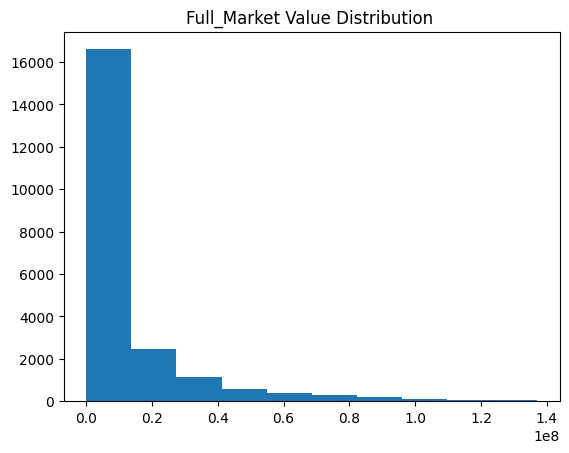

In [14]:
# Create the histogram..

import matplotlib.pyplot as plt

fig,ax = plt.subplots()

ax.hist(clean_df_contained['Full_Market_Value'])


plt.title('Full_Market Value Distribution ')
plt.show()

- We see that the distribution is mostly right tail skewed.. (most models are clustered in the lower value ranges..)
- A long but controlled tail -> The tail is thinner now which is keeping realistic high-end building which removes the extereme edge cases.
-

- Let's keep a log shaped histogram

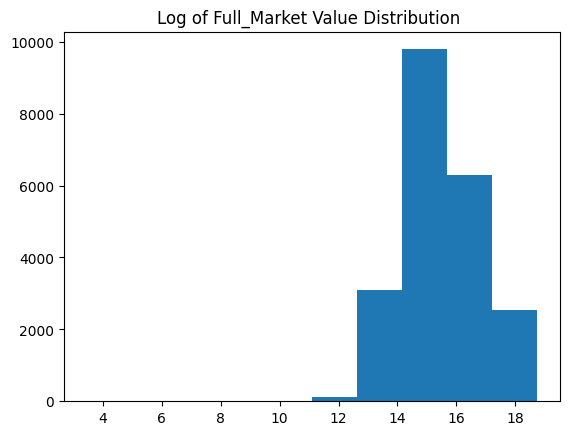

In [15]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

ax.hist(np.log(clean_df_contained['Full_Market_Value']))


plt.title('Log of Full_Market Value Distribution ')
plt.show()

# Data Cleaning and Model Preparation

- Remove the BBL and Address Id columns as they are unique to every rows and will confuse each model..

In [16]:
clean_df_contained.columns

Index(['Boro_Block_lot', 'Address', 'Neighborhood', 'Building_Classification',
       'Total_Units', 'Year_Built', 'Gross_SqFt', 'Estimated_Gross_Income',
       'Estimated_Expense', 'Net_Operating_Income', 'Full_Market_Value',
       'Report_Year', 'Building_Age', 'Expense_Ratio', 'Income_per_Sqft'],
      dtype='object')

In [17]:
clean_df.shape

(22065, 15)

In [18]:
# Let's remove bbl and address

# Create a copy
clean_df_contained_copy = clean_df_contained.copy()

clean_df_contained_copy = clean_df_contained_copy.drop(['Address','Boro_Block_lot'],axis = 1)

# Check the columns bbl and Address should be removed..
clean_df_contained_copy.shape

clean_df_contained_copy.head(5)

,Neighborhood,Building_Classification,Total_Units,Year_Built,Gross_SqFt,Estimated_Gross_Income,Estimated_Expense,Net_Operating_Income,Full_Market_Value,Report_Year,Building_Age,Expense_Ratio,Income_per_Sqft
0,FINANCIAL,R9-CONDOMINIUM,42,1920.0,36500,1216180,293460.0,922720,7156000.0,2012,92.0,0.241297,33.320000
1,FINANCIAL,R4-CONDOMINIUM,78,1985.0,126420,6823366,1638934.0,5184432,39143000.0,2012,27.0,0.240194,53.973786
2,FINANCIAL,RR-CONDOMINIUM,500,1927.0,554174,16609710,3668467.0,12941243,93405000.0,2012,85.0,0.220863,29.972012
3,FINANCIAL,R4-CONDOMINIUM,282,1930.0,249076,8946810,2744818.0,6201992,46825007.0,2012,82.0,0.306793,35.920000
4,TRIBECA,R4-CONDOMINIUM,239,1985.0,219495,7072129,1169908.0,5902221,44562006.0,2012,27.0,0.165425,32.220000


## Categorical Encoding

- Categorical Encoding -> We need to turn `Neighborhood` and `Zoning_Class` into numbers..
- Before we categorically encode the data, we should split the data `train_and_test`

In [19]:
from sklearn.model_selection import train_test_split
import numpy as np

# We removed additional columns of the income information to prevent data leakage.

X = clean_df_contained_copy.drop(['Full_Market_Value','Estimated_Gross_Income','Estimated_Expense','Net_Operating_Income','Income_per_Sqft','Expense_Ratio'],axis = 1)
y = clean_df_contained_copy['Full_Market_Value']

- Split the dataset into train/test

- We removed additional columns because of potential data-leakage seeping into the model.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape)
print(y_train.shape)

(16383, 7)
(16383,)


- Import OneHotEncoder

- We use `remainder = passthrough` to pass an encoder to ignore the numeric columns while transforming the discrete columns


In [21]:
# label the numeric columns and then the discrete columns

X_train.columns

Index(['Neighborhood', 'Building_Classification', 'Total_Units', 'Year_Built',
       'Gross_SqFt', 'Report_Year', 'Building_Age'],
      dtype='object')

In [22]:
# Label the numerical columns and then the discrete columns.. edit we removed the income columns because of potential data-leakage that can occur


# numerical_cols = ['Total_Units','Gross_SqFt','Year_Built','Estimated_Gross_Income','Estimated_Expense','Net_Operating_Income','Report_Year','Building_Age','Income_per_Sqft','Expense_Ratio']

numerical_cols = ['Total_Units','Gross_SqFt','Year_Built','Report_Year','Building_Age']

categorical_cols = ['Neighborhood','Building_Classification']

In [23]:
X_train.dtypes

,0
Neighborhood,object
Building_Classification,object
Total_Units,int64
Year_Built,float64
Gross_SqFt,int64
Report_Year,int64
Building_Age,float64


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define the transformer for Categorical_Columns, apply OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Create The ColumnTransformer
# remainder = 'passthorugh` keeps all columns not listed in transformer
preprocessor = ColumnTransformer(
    transformers = [(
        'cat', encoder, categorical_cols)
    ],
    remainder = 'passthrough'
)


# Fit the encoder to the *training data only* and transform the training data
X_train_encoded = preprocessor.fit_transform(X_train)

# Transform the test data using the *same* fitted encoder
X_test_encoded = preprocessor.transform(X_test)

- So far we have fit the `OneHotEncoder` on `categorical_columns` in the training data.
- Transforms those columns into one-hot encoded features
- Pass thorugh all the numeric columns unchanged
- Applied the same transformation rules to the test set.

In [25]:
print(f"X_train_encoded shape: {X_train_encoded.shape}")
print(f"X_test_encoded shape: {X_test_encoded.shape}")

X_train_encoded shape: (16383, 197)
X_test_encoded shape: (5461, 197)


Encoding our data, we have 202 columns..

In [26]:
# Quick Pivot let's make our y_train and y_test into log values..

y_train_log = np.log(y_train)

y_test_log = np.log(y_test)

## Debugging Issues

- With high number of cardinality (i.e. a huge number of columns..)

In [27]:
# Debugging issues with high number of columns
print('Neighborhood unique values',clean_df_contained['Neighborhood'].nunique())

Neighborhood unique values 180


In [28]:
# Debugging issues with high number of values
print('Building Classification unique value is:', clean_df_contained['Building_Classification'].nunique())

Building Classification unique value is: 13


In [29]:
# Fixed issue by clearly including all the numeric columns.. in the list
X_train.shape, X_test.shape

((16383, 7), (5461, 7))

## Training and Evaluation

Let's train a model on our cleaned up dataframe.. let's implement `RandomForest` since tree methods are more robust than `LinearRegression`

In [30]:
 from sklearn.ensemble import RandomForestRegressor

 # Create our RandomForestRegressor

 regr = RandomForestRegressor()

 # Fit our data to the training set

 regr.fit(X_train_encoded,y_train_log)

RandomForestRegressor()

In [31]:
# Let's test our data onto the training set., we have the same length values
y_train_pred = regr.predict(X_train_encoded)
len(regr.predict(X_train_encoded)), len(y_train_log)

(16383, 16383)

Let's check out the MAE.

In [32]:
from sklearn.metrics import mean_squared_error

# We need to undo the transformation of log by applying exp

mse = mean_squared_error(np.exp(y_train_pred),np.exp(y_train_log))

print("Mean Squared Error is:", mse)
print("RMSE is: ", np.sqrt(mse))

Mean Squared Error is: 1703853555337.0188
RMSE is:  1305317.4155495737


Hmm the RMSE and MAE doesn't look too good with the default values.. even if it is applied on the training_set

Let's try it on the test_set.

In [33]:
# Make y_predictions
y_pred = regr.predict(X_test_encoded)

In [34]:
mse_test = mean_squared_error(np.exp(y_pred),np.exp(y_test_log))

print("Mean Squared Error is:", mse_test)
print("RMSE is: ", np.sqrt(mse_test))

Mean Squared Error is: 13928346124621.477
RMSE is:  3732069.951732078


- Check out R2_score, the R_squared value is aka the coefficient of determination, that measures the proportion of the variance from the dv that is predictable from the IV.
- A higher R_squared value indicates a better fit to the model

In [35]:
from sklearn.metrics import r2_score
r2 = r2_score(np.exp(y_test_log), np.exp(y_pred))
print('R_squared score is: ', r2)

R_squared score is:  0.963262525695319


### Interpretations of Results:

- Our R_squared value is 98.4% correct, which means our model explains 98.4% of the variance in NYC condo values,
- Our RMSE value is appromixately 2.49 million, which in our domain for apartments where properties range from a few million, this is reasonable

#### Calculation of MAE:

- Now we calculated Mean Absolute Error: which is translated as the average dollar mistake.

In [36]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(np.exp(y_test_log), np.exp(y_pred))
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")

Mean Absolute Error (MAE): $1,384,347.01


- This means our model on average is only off about 239k, where in a market, where properties often sell for 5 mill, or 10 mill, this error of 239k is especially precise.

## Feature Importance:

- Now we focus on the feature importance of our graph, to understand why the model is making these predictions.

- How do I match the feature importance with the predictions

In [37]:
# Feature Importance but how do I
features_importance = regr.feature_importances_
features_name = preprocessor.get_feature_names_out()


# Let's create a dataframe = put the values together

feature = pd.DataFrame({
    'feature_importance':features_importance,
    'feature_name': features_name
})

feature.head(5)

,feature_importance,feature_name
0,7.351779e-07,cat__Neighborhood_'15TH Q QUEENS'
1,5.048963e-06,cat__Neighborhood_'30TH Q BROOKLYN'
2,1.013827e-05,cat__Neighborhood_'50TH Q BROOKLYN'
3,2.581930e-07,cat__Neighborhood_'5TH Q BROOKLYN'
4,1.218522e-05,cat__Neighborhood_'75TH Q BROOKLYN'


In [38]:
sorted_features = feature.sort_values(by = 'feature_importance',ascending = False)

thin_features = sorted_features.head(10)

thin_features

,feature_importance,feature_name
194,0.838873,remainder__Gross_SqFt
192,0.019576,remainder__Total_Units
193,0.017258,remainder__Year_Built
195,0.014454,remainder__Report_Year
196,0.011894,remainder__Building_Age
159,0.005623,cat__Neighborhood_MORRISANIA/LONGWOOD
125,0.005356,cat__Neighborhood_CHELSEA
103,0.003141,cat__Neighborhood_'UPPER EAST SIDE (79-96)'
137,0.002734,cat__Neighborhood_FLUSHING-NORTH
130,0.002723,cat__Neighborhood_ELMHURST


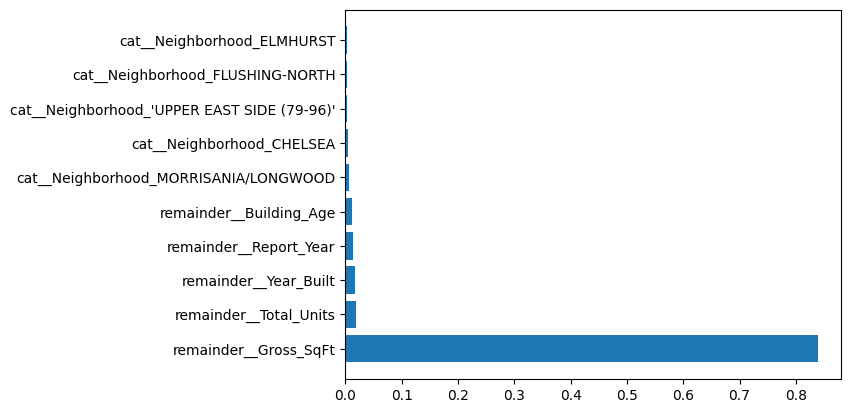

In [39]:
# Plot the bar chart now

import matplotlib.pyplot as plt

fig,ax = plt.subplots()

ax.barh(thin_features['feature_name'],thin_features['feature_importance'])

plt.show()


- Let's plot the predictions vs actual values.. now



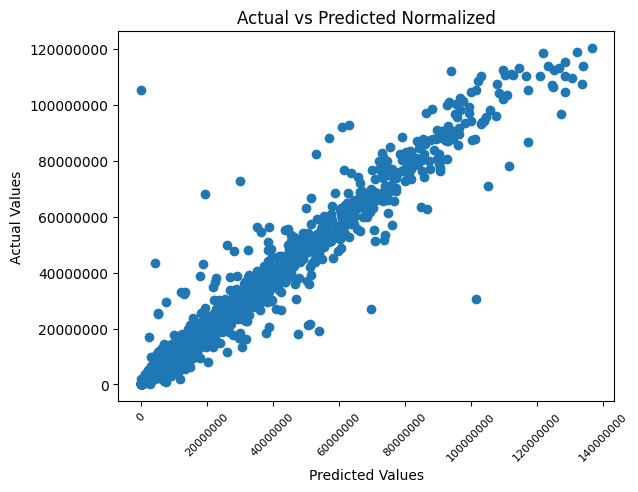

In [40]:
fig, ax = plt.subplots()

ax.scatter(np.exp(y_test_log),np.exp(y_pred))
plt.title('Actual vs Predicted Normalized')
plt.ticklabel_format(style = 'plain')
plt.xticks(rotation = 45, size = 8)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

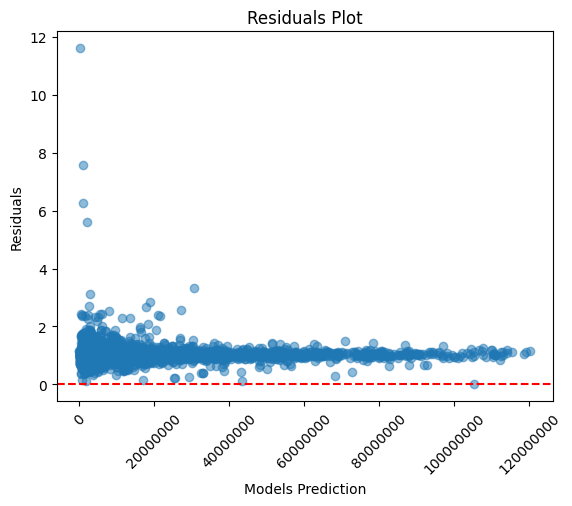

In [45]:
# Let's define our residual plots then

residuals = y_test_log - y_pred

fig,ax = plt.subplots()

ax.scatter(np.exp(y_pred),np.exp(residuals), alpha = 0.5)

ax.set_title('Residuals Plot')
ax.set_xlabel('Models Prediction')
ax.set_ylabel('Residuals')
plt.ticklabel_format(style = 'plain')
plt.xticks(rotation = 45)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()

# Interpretation:

- Our model is biased it under-predicts the values..

- We would say that the residual plots shows a consistent positive bias, meaning the model is conservative, we can account for geospatial data or qualitative data (building amenities) which often account for the `premium` that drives actual prices higher than base lines.

It looks really well, the predictions are really close to the actual values, since we see a line forming.

# Conclusion:
- With data leakage, the model was performing well and the net_operating_income was leaking information to the response variable which was to the `full_market_value`, my model ignored all the other predictors and used `full_market_value`.

Full Market Value ≈ Net Operating Income / Cap Rate, this `Net_Operating Income` was a cheat code for predicting Full_Market_Value

Suggestions: Drop `Net_Operating_Income`, `Estimated_Gross_Income`, `Estimated_Expense` from features as they directly derived or directly predict the full market value

The reason: our model worked so well was because of data-leakage, where the model had acess to features that were otherwise not gonna be availabe during model training and initial data collection, by removing the income features, we are forcing the model to learn the `intrinsic value` of the property.

In essence, we are not teaching the model on how to appraise a building, we teach the model how to reverse engineer a "simple" math equation. We know a model is cheating due to its high `r_squared value`.

- From our reformed model, our feature importance model shows that `gross_sqft` has accounts for 84% of model influence, with followed by 0.019 and 0.018 with `Total_Units` and `Year_Built`. We also see the type of neighborhood also influnces the model albeit a very tiny percentage.